In [103]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from layers import TriangularLayer


In [104]:
# def points_in_parallelogram(points, a1, b1, a2, b2, shift=(0, 0, 0, 0)):
#     # Transpose points for easier unpacking
#     left_shift, right_shift, bottom_shift, top_shift = shift
#     p, q = points.T

#     # Slopes and intercepts for lines defining the parallelogram
#     m1 = b1 / a1 if a1 != 0 else float('inf')  # Handle vertical line case
#     c1 = b1 - m1 * a1 + top_shift*np.sqrt(1+m1**2)
#     c2 = b2 + b1 - m1 * (a1 + a2) + bottom_shift*np.sqrt(1+m1**2)
#     c1, c2 = c2, c1  # Ensure c1 <= c2

#     m2 = b2 / a2 if a2 != 0 else float('inf')  # Handle vertical line case
#     d1 = b2 - m2 * a2 - left_shift*np.sqrt(1+m2**2)*np.sign(m2)
#     d2 = b1 + b2 - m2 * (a1 + a2) - right_shift*np.sqrt(1+m2**2)*np.sign(m2)
#     if m2 > 0: d1, d2 = d2, d1  # Ensure d1 <= d2
#     print(f"{c1=}, {c2=}, {d1=}, {d2=}")

#     return points[
#           (       c1  <=  q  - m1*p)
#         & (q  - m1*p  <          c2)
#         & (       d1  <=  q  - m2*p)
#         & (q  - m2*p  <          d2)
#     ]

def inside_polygon(points: np.ndarray, polygon: np.ndarray) -> np.ndarray:
    x, y = points[:, 0], points[:, 1]
    px, py = polygon[:, 0], polygon[:, 1]
    px_next, py_next = np.roll(px, -1), np.roll(py, -1)
    edge_cond = (y[:, None] > np.minimum(py, py_next)) & (y[:, None] <= np.maximum(py, py_next))
    with np.errstate(divide='ignore', invalid='ignore'):
        xinters = np.where(py != py_next, (y[:, None] - py) * (px_next - px) / (py_next - py) + px, np.inf)
    ray_crosses = edge_cond & (x[:, None] <= xinters)
    inside = np.sum(ray_crosses, axis=1) % 2 == 1
    return points[inside]

def point_positions(points: np.ndarray, A: np.ndarray, B: np.ndarray) -> np.ndarray:
    # Compute determinants for positions relative to OA and BC
    det_OA = (points[:, 0] * A[1] - points[:, 1] * A[0]) <= 2
    det_BC = ((points[:, 0] - B[0]) * A[1] - (points[:, 1] - B[1]) * A[0]) <= 2
    position_y = det_OA.astype(float) + det_BC.astype(float)

    # Compute determinants for positions relative to OB and AC
    det_OB = (points[:, 0] * B[1] - points[:, 1] * B[0]) > -2
    det_AC = ((points[:, 0] - A[0]) * B[1] - (points[:, 1] - A[1]) * B[0]) > -2
    position_x = det_OB.astype(float) + det_AC.astype(float)

    return np.column_stack((position_x, position_y)) - 1

In [105]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Generating random points
# np.random.seed(42)  # For reproducibility
# points = np.random.rand(100000, 2) * 20 - 10  # Random points in the range [0, 10)

# # Define the parallelogram vectors
# a1, b1 = 5, -1
# a2, b2 = 1, 5

# # make sure the lengths of the vectors are 5
# a1, b1 = a1 * 5 / np.linalg.norm([a1, b1]), b1 * 5 / np.linalg.norm([a1, b1])
# a2, b2 = a2 * 5 / np.linalg.norm([a2, b2]), b2 * 5 / np.linalg.norm([a2, b2])

# # Use the filtering function
# inside_points = inside_polygon(
#     points,
#     np.array([
#         [0, 0],
#         [a1, b1],
#         [a1+a2, b1+b2],
#         [a2, b2]
#     ]),
# )

# # Define parallelogram vertices
# origin = np.array([0, 0])
# v1 = np.array([a1, b1])
# v2 = np.array([a2, b2])
# v3 = v1 + v2

# # Define the vertices of the parallelogram
# parallelogram = np.array([origin, v1, v3, v2, origin])

# # Plotting
# plt.figure(figsize=(8, 8))
# plt.scatter(points[:, 0], points[:, 1], color='gray', s=1, label='All Points')
# plt.scatter(inside_points[:, 0], inside_points[:, 1], color='blue', s=1, label='Points Inside')
# plt.plot(parallelogram[:, 0], parallelogram[:, 1], color='red', linewidth=2, label='Parallelogram')

# plt.title("Points and Parallelogram")
# plt.xlabel("X-axis")
# plt.ylabel("Y-axis")
# plt.legend()
# plt.grid(True)
# plt.axis("equal")  # Equal aspect ratio for proper visualization

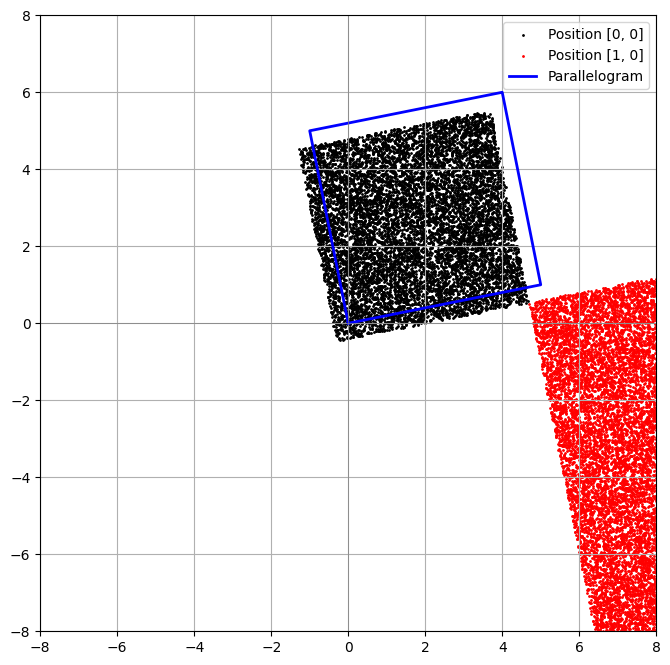

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random points
np.random.seed(42)
points = np.random.uniform(-8, 8, (100000, 2))

# Define parallelogram vertices
O = np.array([0, 0])
A = np.array([5, 1])
B = np.array([-1, 5])
D = A + B
polygon = np.array([O, A, D, B])

# Compute positions
positions = point_positions(points, A, B)

# Filter points based on positions
black_points = points[(positions[:, 0] == 0) & (positions[:, 1] == 0)]
red_points = points[(positions[:, 0] == 1) & (positions[:, 1] == -1)]

# Plot the results
plt.figure(figsize=(8, 8))
plt.scatter(black_points[:, 0], black_points[:, 1], color='black', s=1, label='Position [0, 0]')
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', s=1, label='Position [1, 0]')

# Plot the parallelogram
parallelogram = np.array([O, A, D, B, O])
plt.plot(parallelogram[:, 0], parallelogram[:, 1], color='blue', linewidth=2, label='Parallelogram')

# Final touches
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid()
plt.show()


In [2]:
import numpy as np

# Example dictionary for testing
mapping = {1: 10, 2: 20, 3: 30, 4: 40, 5: 50}

# Function to test numpy vectorization
def test_vectorized_dict_get():
    # Test array
    test_array = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5]])

    # Vectorized application of dict.get
    vectorized_get = np.vectorize(mapping.get)
    result = vectorized_get(test_array)
    
    return result

output = test_vectorized_dict_get()

In [3]:
output

array([[10, 20, 30],
       [20, 30, 40],
       [30, 40, 50]])